# Object1. 비정상 데이터를 정상 데이터로 만들기

### 비정상 데이터를 정상 데이터로 만들기

Airline Passengers Dataset은
1950년대 국제 항공사를 이용한 월별 승객 수(time series)를 기록한 단변량 시계열 데이터이다.

In [9]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# 데이터셋 로드 및 확인
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'

ap = pd.read_csv(url)
print(ap.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


In [32]:
# 정상 시계열 변환 시 Month 정보는 필요 없으므로 제거
ap = ap.drop('Month', axis=1)

In [33]:
ap

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


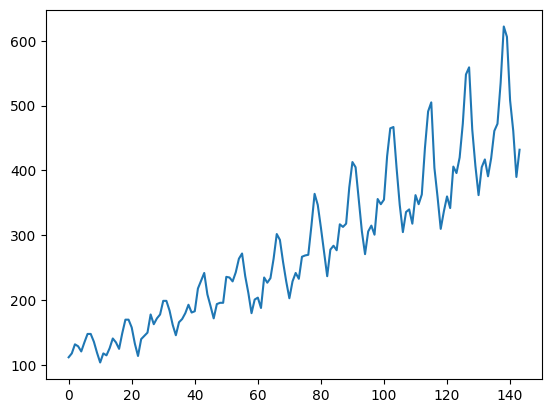

In [34]:
plt.figure()
plt.plot(ap)
plt.show()

그래프를 보면 상승하는 추세와 점점 커지는 분산으로 인해 이 데이터는 완벽한 비정상(non-) 데이터라고 할 수 있다.

<br>

### 1. 분산을 일정하게 만들기

- log tramsformation

In [35]:
# np.log를 통해서 log transformation
log_transformed = np.log(ap)

In [36]:
log_transformed

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


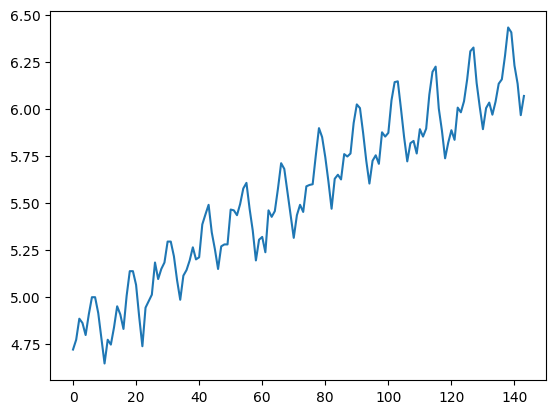

In [37]:
# 분산이 일정해진 것을 눈으로 확인할 수 있다.
plt.figure()
plt.plot(log_transformed)
plt.show()

로그 변환 후, 증가하던 분산이 통제되어 분산이 일정해진 것을 확인할 수 있다.

<br>

### 2. 차분을 통해 추세 제거하기

차분을 수행하면 데이터가 짧아지기 때문에 데이터를 잘라서 사용하고,  
차분 후 NaN 값을 제거하고 활용해야 한다.

In [38]:
# diff() 함수를 통해 간단하게 차분을 수행할 수 있다.
diffed = log_transformed.diff()[1:]

In [39]:
diffed

,Passengers
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
5,0.109484
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


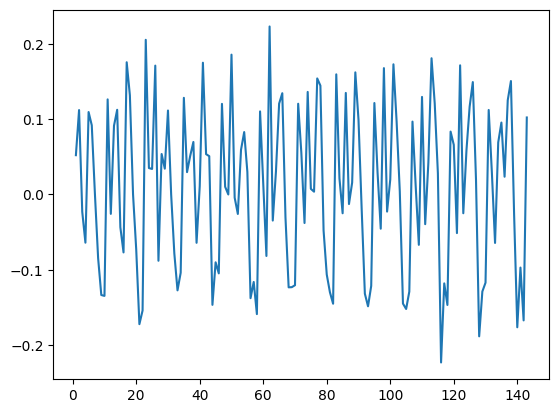

In [41]:
plt.figure()
plt.plot(diffed)
plt.show()

평균은 0이고, 커지는 분산과 증가하는 추세를 제거한 데이터를 얻을 수 있다.

<br>

### 3. 계졀 차분을 통해 계절성 제거하기

AirPassengers 데이터에는 12개월을 주기로 하는 계정성이 포함되어 있다.

이럴 경우에는 계절 차분을 통해서 계절성을 데이터에서 제거할 수 있다.

In [42]:
# diff에 12라는 값을 넣어주면 주기를 12로 하는 계절 차분을 수행할 수 있다.
seasonally_diffed = diffed.diff(12)
seasonally_diffed

,Passengers
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


In [44]:
# 차분을 하면 데이터가 짧아지기 때문에 NaN 값을 제거해야 한다.
seasonally_diffed.dropna(inplace = True)
seasonally_diffed

,Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


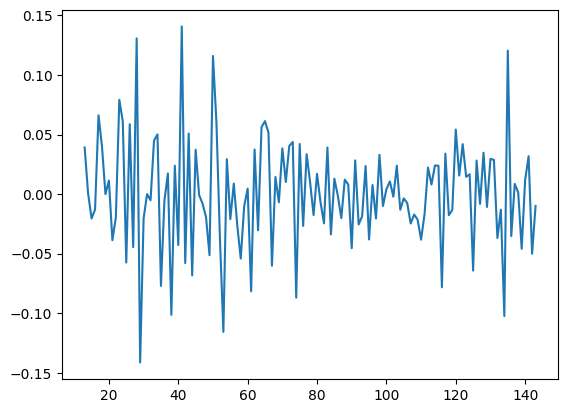

In [45]:
# 계절 차분 수행 후
plt.figure()
plt.plot(seasonally_diffed)
plt.show()

시각적으로 확인했을 때는 분산이 움직이는 것 같기도 한데, stationary한 것 같기도 하다.

검정을 통해 시계열이 정상성을 띄고 있는지 아닌지 확인해야 한다.

<br>

### 4. 검정을 통해 정상성 확인하기

In [46]:
# ADF 검정
from statsmodels.tsa.stattools import adfuller

In [49]:
# ADF 검정을 위한 함수 정의
def adf_test(x):
    stat, p_value, lags, nobs, crit, icb = adfuller(x) # adfuller 함수를 이용하면 6가지 output이 나온다.
    print('ADF statistics')
    print(stat)     # ADF 검정 통계량
    print('\nP-value')
    print(p_value)  # P-value

In [50]:
# 계절차분까지 수행한 데이터로 adf 테스트를 수행
adf_test(seasonally_diffed)

ADF statistics
-4.4433249418311425

P-value
0.00024859123113838495


계절 차분까지 수행한 이 데이터는 p-value가 약 0.0002로,  
유의수준 0.01에서 단위근이 존재한다라는 귀무가설을 기각하고 시계열은 정상적이다라는 대립가설을 채택할 수 있다.

<br>

---

<br>
<br>
<br>

# Object2. 시계열 분류 프로젝트

tsfresh 패키지에서 제공하는 대시계열 분류 예제인  robot_execution_failures 데이터셋을 사용하여 센서 기반 시계열 분석 및 예측 모델링을 수행한다.

<br>

#### 개요

- 목적: 로봇이 작업 중 실패(Failure)를 일으켰는지 여부를 예측
- 형태: 다변량 시계열 데이터
- 관측 단위: 로봇 작업 1건당 하나의 시계열(id로 구분)
- 총 샘플 수: 88개 시계열 (id=1~88)
- 센서 수: 6개 센서 (F_x, F_y, F_z, T_x, T_y, T_z)
  - F: Force (힘), T: Torque (토크)
- 시간 길이: 각 id마다 15개의 시점 관측
- 타겟: y (Boolean)  
  - True: 해당 작업 중 오류 발생 (실패)  
  - False: 정상 작동



<br>

#### 목차

1. 데이터 로드 및 확인
    
    1.1 &nbsp;데이터 로드 및 확인  
    1.2 &nbsp;타겟 분포 확인  
    1.3 &nbsp;시계열 길이 및 분포 확인  
    
2. 데이터 전처리
    
    2.1 &nbsp;데이터 분할 (Custom Split)  
    2.2 &nbsp;특징 추출(Feature Extraction)  
    2.3 &nbsp;결측치 처리  
    
3. EDA: Feature Exploration
    
    3.1 &nbsp;추출된 상위 특징  
    3.2 &nbsp;추출된 상위 특징 해석   
    3.3 &nbsp;추출된 상위 특징 분포 시각화
    
4. 모델 학습 및 성능 비교
    
    4.1 &nbsp;LogisticRegression  
    4.2 &nbsp;RandomForest  
    4.3 &nbsp;XGBoost   
    4.4 &nbsp;모델 성능 비교 및 선택  
    4.5 &nbsp;특징 중요도 시각화: XGBoost

5. 마무리

<br>


## 1. 데이터 로드 및 확인

시계열 분류 실습용 데이터셋 robot_execution_failures을 다운로드하고  
시계열 데이터 (timeseries)와 타겟 레이블 (y)을 불러온다.

In [214]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시계열 특징 추출
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

<br>

### 1.1 &nbsp;데이터 로드 및 확인

In [215]:
# 데이터 다운로드 및 불러오기
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures

download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [216]:
# 데이터셋 확인
timeseries  # 센서 시계열 데이터

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [217]:
y  # Target 클래스

,0
1,True
2,True
3,True
4,True
5,True
...,...
84,False
85,False
86,False
87,False


In [218]:
print('결측치 확인')
print(timeseries.isnull().sum())

결측치 확인
id      0
time    0
F_x     0
F_y     0
F_z     0
T_x     0
T_y     0
T_z     0
dtype: int64


<br>

### 1.2 &nbsp;타겟 분포 확인

Target(y) 클래스 분포
False    67
True     21
Name: count, dtype: int64


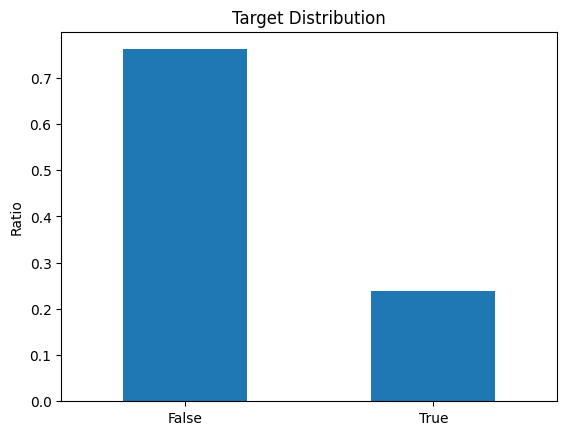

In [219]:
# 타겟 변수 y의 클래스 분포 확인 (불균형 여부)
print("Target(y) 클래스 분포")
print(y.value_counts())
y.value_counts(normalize=True).plot(kind='bar', title='Target Distribution')
plt.xticks(rotation=0)
plt.ylabel("Ratio")
plt.show()

성공 클래스(False)가 약 3배 더 많은 구조로, 불균형 이진 분류 문제로 볼 수 있다.

정확도(Accuracy)만으로 모델을 평가할 경우 대부분의 예측을 '성공'으로만 해도 높은 정확도를 얻을 수 있다. 따라서 정밀도(Precision), 재현율(Recall), F1-score 등의 보조 지표를 함께 활용하는 것이 필요하다.

<br>

### 1.3 &nbsp;시계열 길이 및 분포 확인

로봇 실행 데이터를 구성하는 각 id는 하나의 독립된 작업(시계열 샘플)에 해당하며, 해당 작업이 수행되는 동안 센서 데이터를 연속적으로 기록한다.

이에 따라 각 id별 시계열 길이(=관측된 시간 포인트 수)를 확인한다.

시계열 길이 통계
count    88.0
mean     15.0
std       0.0
min      15.0
25%      15.0
50%      15.0
75%      15.0
max      15.0
dtype: float64


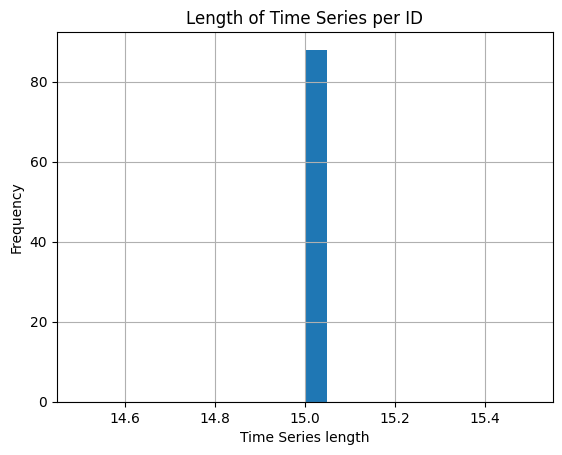

In [220]:
# id 별 시계열 데이터 길이 분포 확인
length_per_id = timeseries.groupby('id').size()
print('시계열 길이 통계')
print(length_per_id.describe())

# 시각화
length_per_id.hist(bins=20)
plt.title('Length of Time Series per ID')
plt.xlabel('Time Series length')
plt.ylabel('Frequency')
plt.show()

모든 시계열 샘플은 길이 15의 균일한 구조를 가진다.  
이후 특징 추출 및 모델 학습 과정에서 안정적이고 일관된 데이터 처리를 가능할 것이라 예상할 수 있다.

<br>

로봇 작업 시 수집된 센서 데이터(F_x, F_y, F_z, T_x, T_y, T_z)는 모델 입력 특성으로 활용된다.  
6개 센서값 간 분포 특성을 시각화하여 변수 간 관계를 분석한다.





센서 데이터 통계 요약
               F_x          F_y          F_z          T_x          T_y  \
count  1320.000000  1320.000000  1320.000000  1320.000000  1320.000000   
mean     -2.345455     8.913636  -128.214394   -39.028030    -4.517424   
std      50.367960    45.845475   346.816091   147.269399   101.609308   
min    -260.000000  -353.000000 -1547.000000  -672.000000  -646.000000   
25%      -4.000000    -2.000000  -117.250000   -39.250000   -13.000000   
50%      -1.000000     1.000000    46.000000    -9.000000    -3.000000   
75%       3.000000    11.000000    60.000000    -1.000000     3.000000   
max     342.000000   236.000000   157.000000   686.000000   601.000000   

               T_z  
count  1320.000000  
mean      0.868182  
std      18.317250  
min    -137.000000  
25%      -1.000000  
50%       0.000000  
75%       2.000000  
max     123.000000  


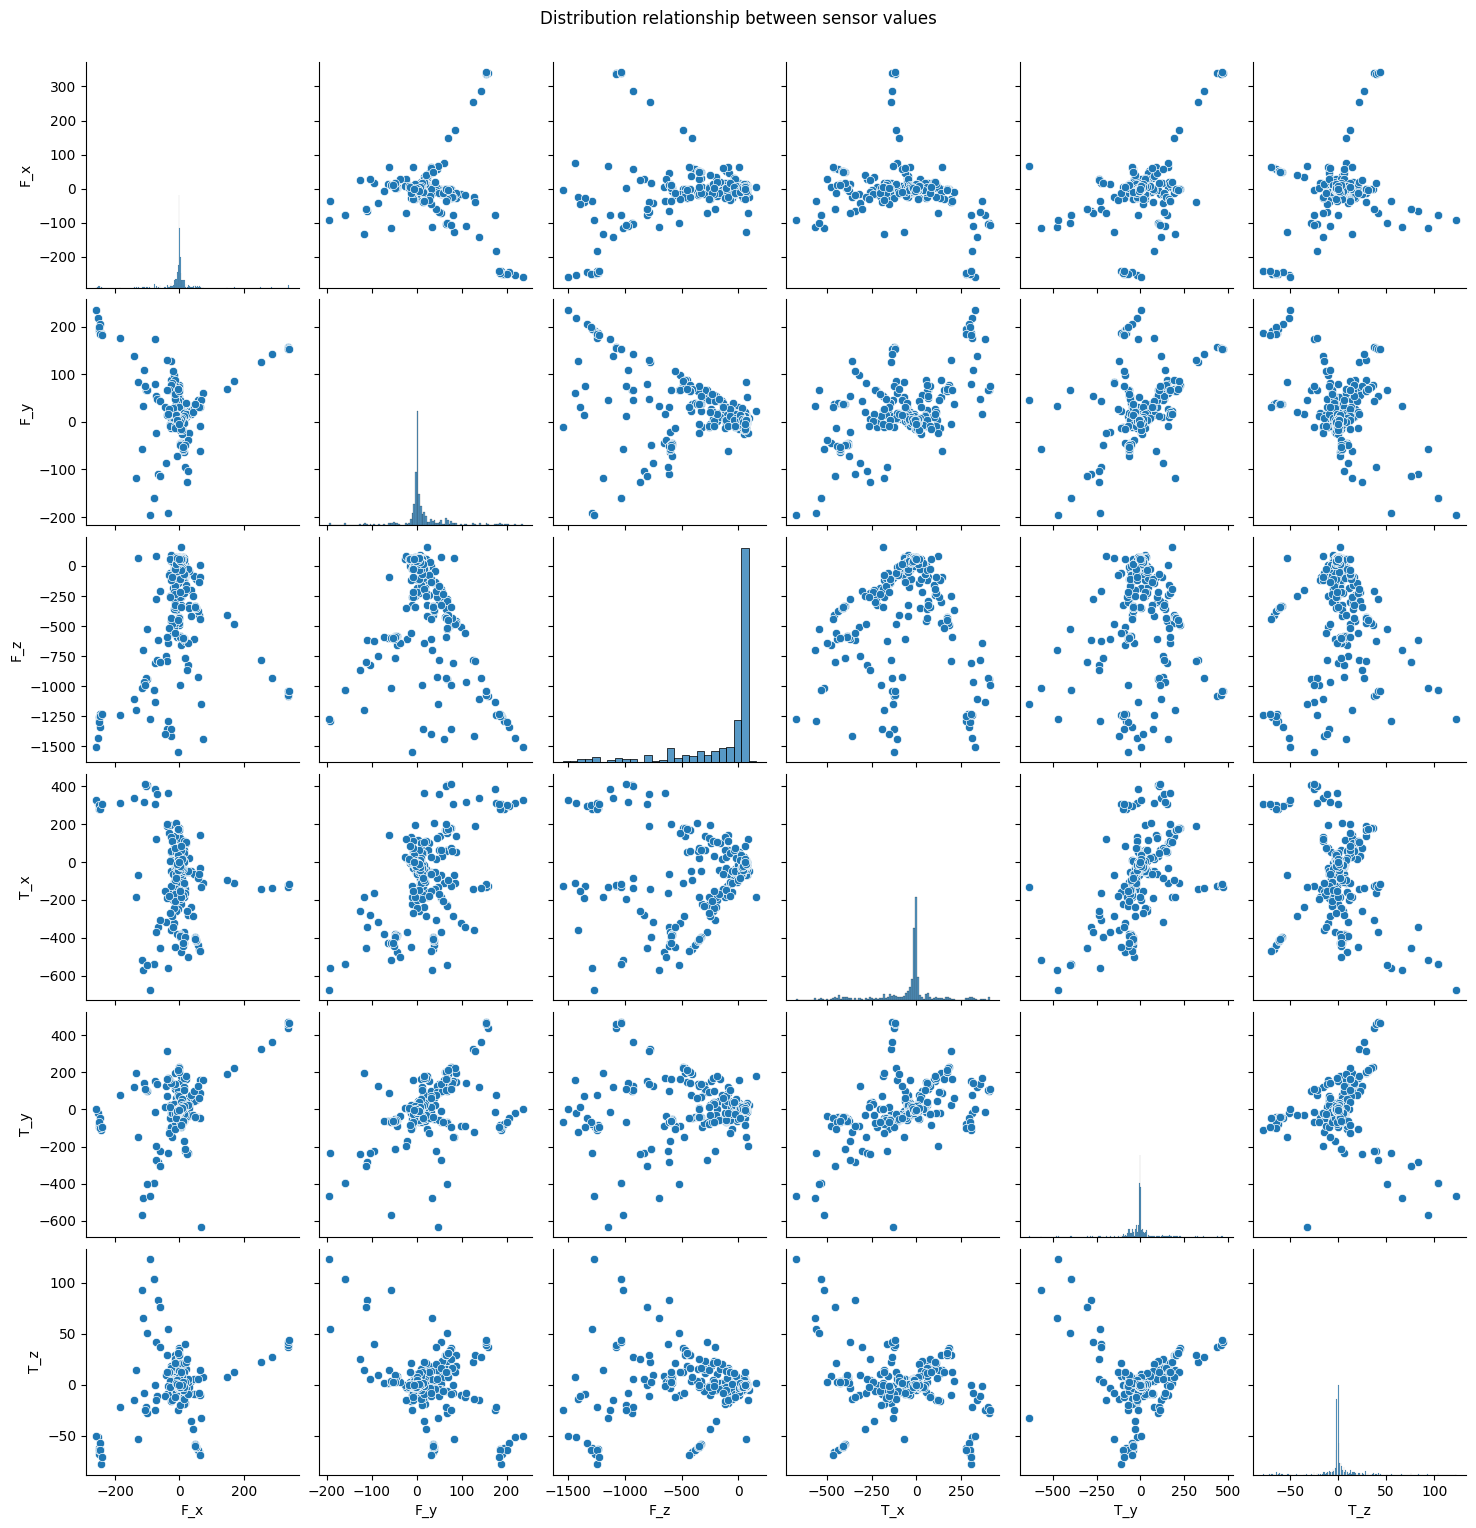

In [221]:
# 센서 데이터(X변수)의 전반적 분포 확인
#  - 센서값들이 어떤 스케일로 분포되어 있는지 확인
#  - 이상치, 특정 축의 비정상적인 값 등 확인 가능
print('센서 데이터 통계 요약')
print(timeseries.drop(columns=['id', 'time']).describe())

# 변수별 분포 시각화
import seaborn as sns
sns.pairplot(timeseries.sample(500)[['F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']])
plt.suptitle('Distribution relationship between sensor values', y=1.02)
plt.show()

변수 간 강한 선형 관계는 보이지 않으며 대부분 비선형적이고 산발적인 분포를 보인다.  
F_z의 경우 유독 분산이 크고 한곳에 집중된 형태로, 다른 변수들과 비정형적인 분포 차이를 나타내는 것을 확인할 수 있다.

<br>
<br>

## 2. 데이터 전처리

### 2.1 &nbsp;데이터 분할 (Custom Split)

- id 기반으로 train/test 셋을 분리 함수
    - y값의 불균형을 고려해 균형 분할을 시도

In [223]:
def custom_classification_split(x, y, test_size=0.3):
    """
    주어진 시계열 데이터(x)와 타겟(y)을 기반으로 클래스 균형을 고려한 사용자 정의 분할 함수

    각 id는 독립적인 시계열 샘플을 나타내며, 타겟 클래스의 비율에 맞춰
    일정 비율만큼의 id를 테스트 셋으로 분리하고 나머지를 학습 셋으로 반환한다.

    Parameters
    ----------
    x : pandas.DataFrame
        시계열 센서 데이터. 반드시 'id'와 'time' 컬럼이 포함되어 있어야 함
    y : pandas.Series
        각 id에 대한 타겟값 (True/False). 인덱스는 id와 일치해야 함
    test_size : float, optional (default=0.3)
        테스트 셋에 포함할 비율 (0~1 사이)

    Returns
    -------
    X_train : pandas.DataFrame
        학습용 시계열 데이터
    y_train : pandas.Series
        학습용 타겟값
    X_test : pandas.DataFrame
        테스트용 시계열 데이터
    y_test : pandas.Series
        테스트용 타겟값 (id 기준 정렬됨)
    """

    # 클래스별로 테스트셋에 포함될 id 개수 계산
    num_true = int(y.sum() * test_size)
    num_false = int((len(y) - y.sum()) * test_size)

    # False 클래스에서 일부 id + True 클래스에서 일부 id → 테스트셋 id 목록
    id_list = (
        y[y == False].head(num_false).index.to_list() +
        y[y == True].head(num_true).index.to_list()
    )

    # 테스트셋 id를 제외한 나머지 → 학습셋 y
    y_train = y.drop(id_list)

    # 테스트셋 y (인덱스 기준 정렬)
    y_test = y.iloc[id_list].sort_index()

    # 시계열 X 데이터에서 id 기준으로 분할
    X_train = x[~x['id'].isin(id_list)]  # 테스트셋 id가 아닌 것만 남김
    X_test = x[x['id'].isin(id_list)]    # 테스트셋 id만 남김

    return X_train, y_train, X_test, y_test

In [224]:
# 데이터 분할
# : 전체 timeseries와 타겟 변수 y를 훈련용(train)과 테스트용(test)으로 분할한다.
X_train, y_train, X_test, y_test = custom_classification_split(timeseries, y, test_size=0.25)

print('X_train id 수:', X_train['id'].nunique())
print('X_test id 수:', X_test['id'].nunique())
print('-'*50)
print(X_train)
print('-'*50)
print(y_train)
print('-'*50)
print(X_test)
print('-'*50)
print(y_test)

X_train id 수: 67
X_test id 수: 21
--------------------------------------------------
      id  time  F_x  F_y  F_z  T_x  T_y  T_z
75     6     0   -1    2   57  -10   -3    0
76     6     1   -2    3   60  -12   -4   -1
77     6     2   -1    2   63  -12   -6    1
78     6     3    1    3   62  -11    0    0
79     6     4   -3    2   56   -9   -4    0
...   ..   ...  ...  ...  ...  ...  ...  ...
1315  88    10  -10    2   39  -21  -24    5
1316  88    11  -11    2   38  -24  -22    6
1317  88    12  -12    3   23  -24  -24    5
1318  88    13  -13    4   26  -29  -27    5
1319  88    14  -13    2   15  -25  -25    6

[1005 rows x 8 columns]
--------------------------------------------------
6      True
7      True
8      True
9      True
10     True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 67, dtype: bool
--------------------------------------------------
     id  time  F_x  F_y  F_z  T_x  T_y  T_z
0     1     0   -1   -1   63   -3   -1    0
1    

X_train
- id를 기준으로 67개의 시계열이 포함되어 있으며, 총 센서 데이터 행 수는 1005개(67 x 15)이다.
- tsfresh의 특징 추출을 통해 머신러닝 모델의 입력값(X)으로 사용된다.

y_train
- 모델 학습에는 67개의 시계열이 사용된다.

X_test
- id를 기준으로 21개의 시계열이 포함되어 있으며, 총 센서 데이터 행 수는 325개(21 x 15)이다.

y_test
- 모델 테스트에는 21개의 시계열이 사용된다.


<br>

### 2.2 &nbsp;특징 추출 (Feature Extraction)


tsfresh를 통해 주요 특징을 추출하고, 결측치를 자동으로 처리한다.  
→ &nbsp;머신러닝 모델 입력을 위해 tsfresh로 시계열 데이터를 단일 행의 특성 벡터로 변환한다.



>EfficientParameters: 큰 계산비용이 필요한 calculator를 제외하고 가능한 모든 특징 생성

In [225]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = EfficientFCParameters()

X_train과 X_test에 대해 `tsfresh.extract_features()`를 수행하여  
시계열 데이터를 기반으로 자동으로 특징을 생성한다.


- column_id="id": 동일 id의 시계열은 하나의 샘플로 간주

- column_sort="time": 시간순 정렬 기준

- EfficientFCParameters: 연산 효율성과 해석성을 고려한 주요 feature 세트 사용

In [226]:
comprehensive_features_train = extract_features(
                                    X_train,
                                    column_id='id',
                                    column_sort='time',
                                    default_fc_parameters=settings
                                    )

Feature Extraction: 100%|██████████| 402/402 [00:38<00:00, 10.32it/s]


In [227]:
comprehensive_features_test = extract_features(
                                    X_test,
                                    column_id='id',
                                    column_sort='time',
                                    default_fc_parameters=settings
                                    )

Feature Extraction: 100%|██████████| 126/126 [00:12<00:00, 10.42it/s]


In [228]:
# 추출된 특징 확인
comprehensive_features_train

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,NaN,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,NaN,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.022809,2.397895,2.302585,2.197225,NaN,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,NaN,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,NaN,NaN,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,1.907284,2.098274,2.302585,2.197225,NaN,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.308605,1.893788,2.163956,2.197225,NaN,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,NaN,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,NaN,40.285714


tsfresh를 활용해 총 4662개의 시계열 기반 특징을 자동 추출하였다.  

In [229]:
# 추출된 특징 개수와 결측치 통계 요약
print(f'Train feature shape: {comprehensive_features_train.shape}')
print(f'Test feature shape: {comprehensive_features_test.shape}')

# 결측치 컬럼 개수
null_counts = comprehensive_features_train.isnull().sum()
print(f'결측치가 있는 컬럼 수: {(null_counts > 0).sum()}')

Train feature shape: (67, 4662)
Test feature shape: (21, 4662)
결측치가 있는 컬럼 수: 2478


In [230]:
# 결측치가 존재하는 컬럼 확인
null_columns = comprehensive_features_train.isnull().sum()
null_columns = null_columns[null_columns > 0].sort_values(ascending=False)

print(null_columns)

T_z__query_similarity_count__query_None__threshold_0.0          67
F_x__partial_autocorrelation__lag_7                             67
F_x__partial_autocorrelation__lag_8                             67
F_x__partial_autocorrelation__lag_9                             67
F_x__spkt_welch_density__coeff_8                                67
                                                                ..
F_x__fft_aggregated__aggtype_"skew"                              1
F_x__fft_aggregated__aggtype_"kurtosis"                          1
T_z__augmented_dickey_fuller__attr_"teststat"__autolag_"AIC"     1
T_z__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"       1
T_z__augmented_dickey_fuller__attr_"usedlag"__autolag_"AIC"      1
Length: 2478, dtype: int64


전체 4662개의 시계열 특징 중 약 53%에 해당하는 2478개 컬럼에서 결측치가 확인되었다.  
일부 특징은 전체 샘플에서 NaN만을 포함하여 정보가 존재하지 않으므로 결측치가 있는 컬럼을 제거한다.

<br>


### 2.3 &nbsp;결측치 처리

특징 추출 후 생성된 데이터프레임은 일부 특징이 계산 불가능하거나, 모든 시계열에 대해 정의되지 않아 결측값을 포함하고 있다.

이러한 결측값은 모델 학습에 영향을 줄 수 있으므로 처리해야 한다.

>`impute()`  
>: tsfresh에서 추출된 특징 데이터프레임에 존재하는 결측치를 자동으로 대체(치환)하여 머신러닝 모델 학습이 가능한 완전한 수치형 테이블로 만들어주는 전처리 함수

In [231]:
# 결측치 처리
impute(comprehensive_features_train)

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.022809,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,1.907284,2.098274,2.302585,2.197225,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.308605,1.893788,2.163956,2.197225,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,0.0,40.285714


In [232]:
impute(comprehensive_features_test)

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,1.073543,1.440235,2.079442,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,0.0,0.857143
19,1.0,0.0,0.0,1.0,99.0,6109.0,13.928571,-1.928571,-1.730769,1.0,...,0.974315,1.494175,1.906155,1.230932,1.704551,2.019815,2.163956,2.197225,0.0,1.428571
20,1.0,0.0,1.0,1.0,155.0,34455.0,16.714286,-13.142857,7.576923,-1.0,...,1.386294,1.667462,2.079442,1.564957,2.022809,2.271869,2.302585,2.197225,0.0,2.571429
21,1.0,0.0,0.0,1.0,-171.0,16495.0,20.928571,1.785714,3.961538,-1.0,...,0.735622,0.735622,0.735622,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,17.285714
22,1.0,0.0,0.0,1.0,102.0,12700.0,10.785714,-8.071429,4.500000,-1.0,...,0.562335,0.735622,1.732868,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,5.428571
23,1.0,0.0,0.0,1.0,67.0,10593.0,15.142857,-7.000000,3.000000,-3.0,...,0.974315,1.255482,2.079442,1.519383,2.369382,2.397895,2.302585,2.197225,0.0,3.714286


모든 NaN 값을 적절히 처리함으로써 모델 학습에 사용할 수 있는 완전한 수치형 데이터셋으로 정제하였다.

In [233]:
# 결측치 컬럼 개수
null_counts = comprehensive_features_train.isnull().sum()
print(f'결측치가 있는 컬럼 수: {(null_counts > 0).sum()}')

결측치가 있는 컬럼 수: 0


<br>
<br>

## 3. EDA: Feature Exploration

### 3.1 &nbsp;추출된 상위 특징

In [234]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

def select_interesting_features(X, y, top_n=10):
    """
    주어진 시계열 기반 특징 데이터에서 분류 문제에 유의미할 수 있는 특징들을 자동으로 선정한다.

    이 함수는 다음 세 가지 기준을 결합하여 각 특징의 중요도를 정량화하고,
    평균 점수가 높은 상위 N개의 특징을 반환한다.

    1) 분산 (Variance): 샘플 간 값의 다양성
    2) Mutual Information: 특징과 타겟 간의 비선형 정보 상관도
    3) 클래스별 평균 차이: 타겟(True/False) 클래스 간 평균값의 차이

    세 기준을 rank(백분위 기준)로 정규화하고 평균을 낸 뒤
    최종적으로 상위 top_n개의 특징을 선정하여 반환한다.

    Parameters
    ----------
    X : pd.DataFrame
        시계열에서 추출된 특징 데이터프레임 (각 행: 샘플, 각 열: 특징)
    y : pd.Series 또는 array-like
        타겟 벡터 (이진 클래스: True / False)
    top_n : int, default=10
        반환할 상위 특징 개수

    Returns
    -------
    top_features : pd.DataFrame
        상위 top_n개의 특징과 각 기준별 점수 및 종합 점수가 포함된 데이터프레임
    """

    # 1. 각 특징의 분산 계산 (값의 다양성)
    variance = X.var()

    # 2. Mutual Information 계산 (비선형 관계 측정)
    mi_scores = mutual_info_classif(X.fillna(0), y, discrete_features=False)

    # 3. 클래스별 평균값 차이 계산 (절댓값)
    class_means = X.groupby(y).mean()
    mean_diff = (class_means.loc[True] - class_means.loc[False]).abs()

    # 4. 세 기준을 통합하여 DataFrame 구성
    score_df = pd.DataFrame({
        'variance': variance,
        'mutual_info': mi_scores,
        'mean_diff': mean_diff
    })

    # 5. NaN 제거 후 각 기준을 백분위(rank)로 정규화하고 평균 점수 계산
    score_df = score_df.dropna()
    score_df['combined_score'] = (
        score_df['variance'].rank(pct=True) +
        score_df['mutual_info'].rank(pct=True) +
        score_df['mean_diff'].rank(pct=True)
    ) / 3

    # 6. 종합 점수가 높은 상위 N개 특징 반환
    top_features = score_df.sort_values('combined_score', ascending=False).head(top_n)
    return top_features

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_variances(X, top_features_df, title='Top Feature Variance Visualization'):
    """
    상위 특징들의 값 분포를 시각화한다.
    각 특징의 값을 샘플 인덱스 기준으로 선 그래프로 보여주어 분산(변동성)을 직관적으로 확인할 수 있다.

    Parameters
    ----------
    X : pd.DataFrame
        특징 데이터프레임
    top_features_df : pd.DataFrame
        select_interesting_features()로 추출된 top_features 결과 (index가 feature 이름)
    title : str
        전체 그래프 제목

    Returns
    -------
    None
    """
    top_features = top_features_df.index.tolist()
    n = len(top_features)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    plt.figure(figsize=(14, n_rows * 3))
    for i, feature in enumerate(top_features):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.plot(X[feature].values)
        plt.title(feature)
        plt.xlabel("Sample Index")
        plt.ylabel("Feature Value")
        plt.grid(True)
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

<br>

### 3.2 &nbsp;추출된 상위 특징 해석

In [236]:
top_features = select_interesting_features(comprehensive_features_train, y_train, top_n=10)
top_features

,variance,mutual_info,mean_diff,combined_score
F_z__c3__lag_3,9.427199e+16,0.472815,1.413180e+08,0.994923
T_y__time_reversal_asymmetry_statistic__lag_3,8.169343e+13,0.483594,3.751249e+05,0.994137
F_z__variance,4.765137e+09,0.513289,6.419025e+04,0.993136
F_z__c3__lag_2,1.017353e+17,0.449432,1.550222e+08,0.991849
F_z__abs_energy,1.975012e+13,0.454535,3.441135e+06,0.990991
F_y__abs_energy,9.230629e+09,0.486672,5.527362e+04,0.990848
T_x__abs_energy,7.322682e+11,0.453974,5.843290e+05,0.989847
F_y__c3__lag_3,9.732919e+11,0.455060,2.552261e+05,0.989775
T_y__variance,5.149099e+07,0.517518,3.754701e+03,0.989668
T_y__abs_energy,2.547617e+11,0.454683,2.512156e+05,0.989418



| 순위 | Feature Name                                    | Variance          | Mutual Info     | Mean Diff         | Combined Score | 분석 요약                                        |
| -- | ----------------------------------------------- | ----------------- | --------------- | ----------------- | -------------- | -------------------------------------------- |
| ①  | F_z__c3__lag_3                                | **9.43e+16**      | 0.4728          | **1.41e+08**      | **0.9949**     | 매우 높은 분산과 클래스 간 평균 차이 → 타겟 구분에 강한 신호         |
| ②  | T_y__time_reversal_...__lag_3 | 8.17e+13          | **0.4836**      | 3.75e+05          | 0.9941         | Mutual Info 기준 2위, 시계열의 **비대칭성**이 타겟 구분에 도움  |
| ③  | F_z__variance                                 | 4.77e+09          | **0.5133** (최고) | 6.42e+04          | 0.9931         | Mutual Info 최고 → 타겟과의 정보적 연결성이 가장 강함         |
| ④  | F_z__c3__lag_2                                | **1.02e+17** (최고) | 0.4494          | **1.55e+08**      | 0.9918         | 최고 분산과 높은 평균 차이 → 가장 폭발적인 분산형 신호             |
| ⑤  | F_z__abs_energy                               | 1.98e+13          | 0.4545          | **3.44e+06** (최고) | 0.9909         | 에너지 총량 기준 클래스 간 차이 극대화 → 강력한 타겟 구분 가능성       |
| ⑥  | F_y__abs_energy                               | 9.23e+09          | **0.4867**      | 5.53e+04          | 0.9908         | Mutual Info 높고, 에너지 수준의 변화가 유의미함             |
| ⑦  | F_y__c3__lag_3                                | 9.73e+11          | 0.4551          | 2.55e+05          | 0.9898         | 지연 자기상관 기반 특징. 클래스 간 변화 양상이 큼                |
| ⑧  | T_x__abs_energy                               | 7.32e+11          | 0.4540          | 5.84e+05          | 0.9898         | 에너지 기반 특징, T_x 축 기준 클래스 간 차이 존재            |
| ⑨  | T_y__variance                                 | 5.15e+07 (최소)  | **0.5175** (최고) | 3.75e+03          | 0.9897         | Mutual Info는 높지만 실제 값 차이는 작음 → 비선형 패턴 반영 가능성 |
| ⑩  | T_y__abs_energy                               | 2.55e+11          | 0.4547          | 2.51e+05          | 0.9893         | T_y 축 에너지 수준에서 구분력 존재                      |

<br>

선정된 상위 특징들은 서로 다른 기준에서 고르게 높은 점수를 획득하였고, 타겟(불량 여부)의 구분에 실질적인 정보를 포함하고 있음이 확인되었다.

분산이나 평균 차이뿐 아니라, mutual information을 통해 비선형 관계를 포착하는 특징들도 확인할 수 있다.

<br>

### 3.3 &nbsp;추출된 상위 특징 분포 시각화


`select_interesting_features()` 함수를 통해 자동 선별된 상위 10개 특징들이 실제로 샘플 간 어떠한 패턴과 변동성을 가지는지를 시각적으로 확인하고자 한다.

각 그래프는 하나의 특징 값이 전체 샘플에 걸쳐 어떻게 변동하는지를 선 그래프 형태로 나타낸다. 이를 통해 모델 입력값으로 사용되는 특징들이 어느 정도의 분산과 변별력을 가지는지 직관적으로 탐색할 수 있다.

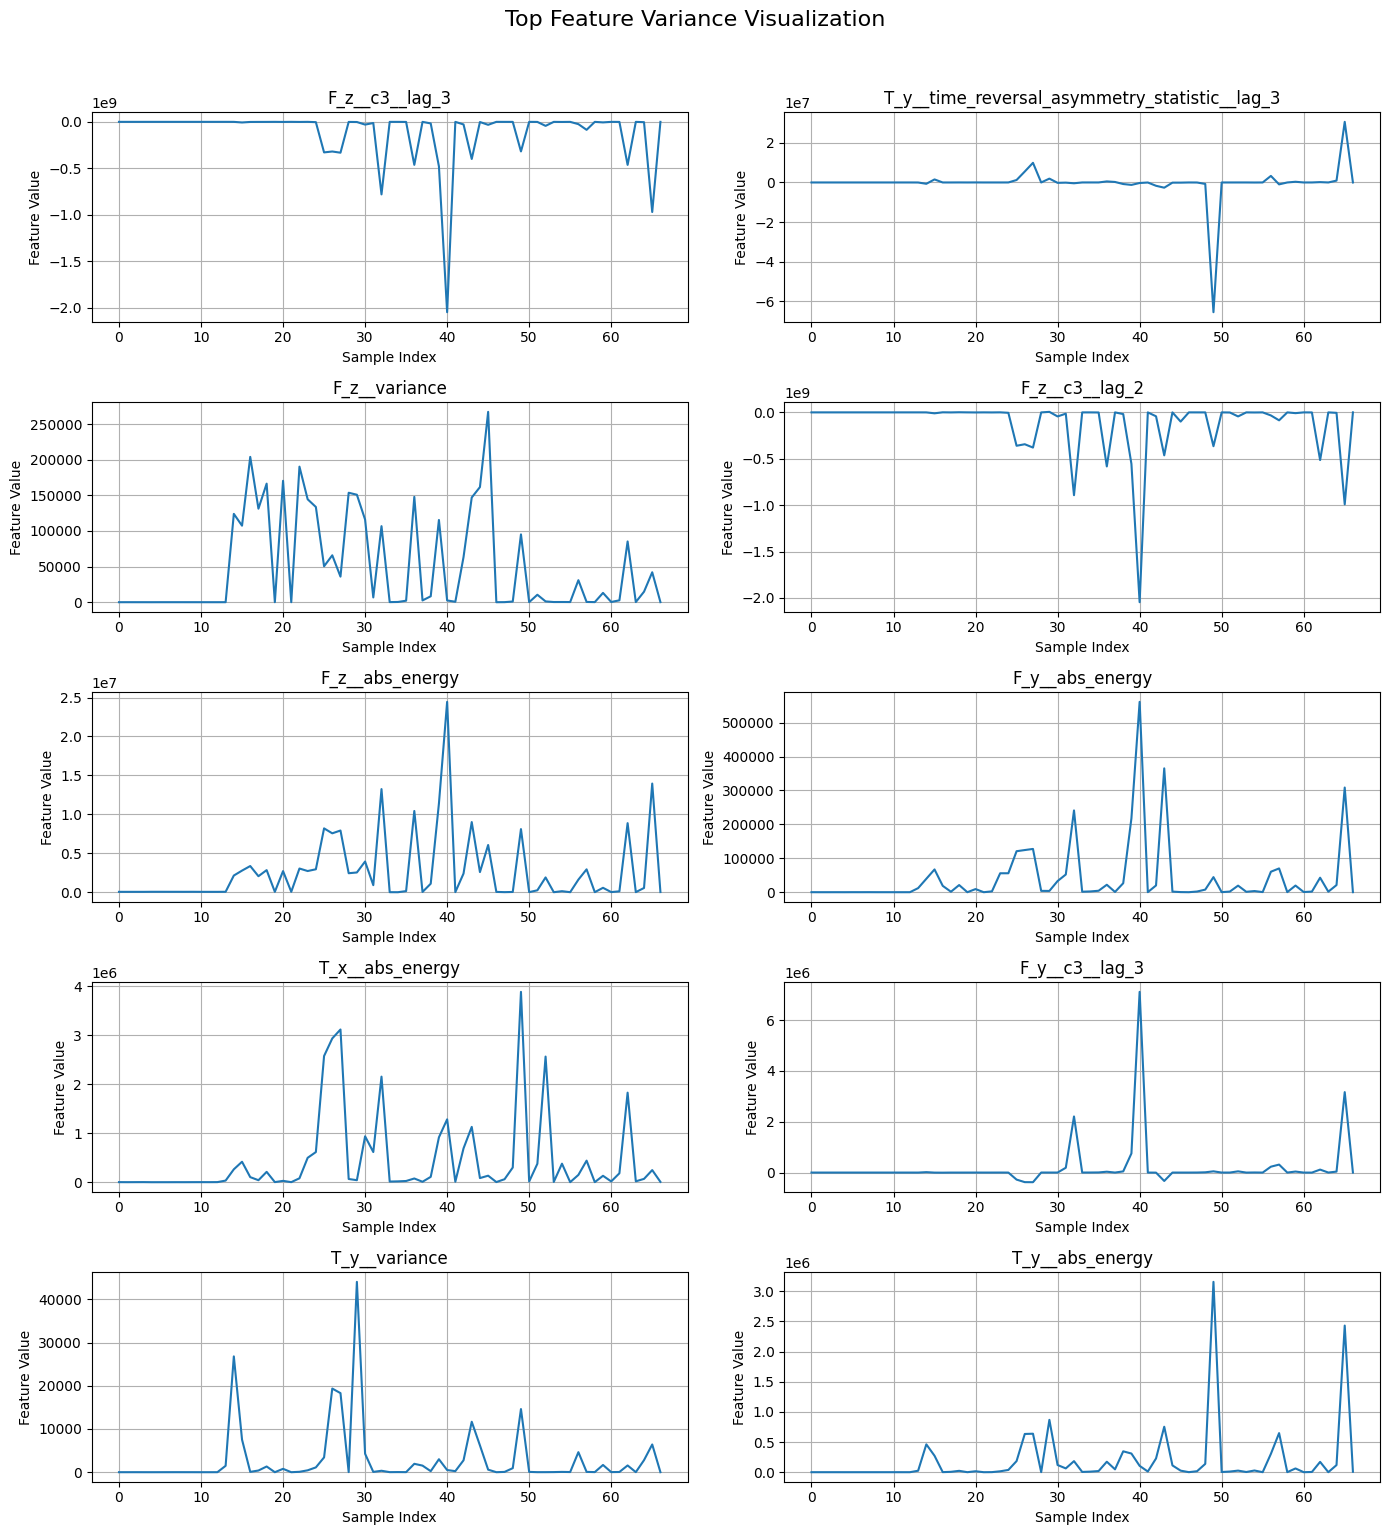

In [237]:
plot_feature_variances(comprehensive_features_train, top_features)

F_z__c3__lag_3, F_z__c3__lag_2
- 전 구간에 걸쳐 큰 음수값으로 평평하게 이어지다가 중간 구간에서 급격한 스파이크를 보임
- 이상치 또는 특정 클래스에서만 발현되는 구조적 패턴으로 보이며, 전체적으로는 일정하지만 극단적인 일부 샘플이 존재  
    → 이 값은 타겟 구분에 매우 민감하게 작용할 수 있는 신호일 수 있음

T_y__time_reversal_asymmetry_statistic__lag_3
- 전체적으로 매우 작은 수치를 유지하다가 후반부 샘플(오른쪽)에서 큰 음수 스파이크 발생
- 대부분 0 근처의 안정적 값이지만, 일부 특정 샘플에서만 비정상적 변화가 발생  
    → 특정 상황 또는 클래스에만 민감하게 반응하는 특징일 가능성.

F_z__variance
- 초반~중반 구간에서 천천히 증가하며, 중간에 몇 개의 큰 봉우리가 존재
- 마지막 10개 샘플에서 급격히 감소  
    → 값의 크기보다는 변화량과 구간별 패턴 차이가 중요해 보임  
    → 분산 기반 특징답게 전체적으로 값의 다양성이 존재

F_z__abs_energy
- 전체적으로 값이 매우 작다가 샘플 중간에 급격히 상승  
    → 에너지가 높은 구간이 일부 특정 샘플에서만 발생한다는 것을 보여줌

F_y__abs_energy, T_x__abs_energy, T_y__abs_energy
- 전반적으로 낮은 값 → 특정 지점에서 상승 → 다시 낮아짐의 패턴 반복  
    → 클래스 간 차이를 모델이 구분할 수 있는 정보량이 있는 특징으로 판단 가능

F_y__c3__lag_3
- 대부분 0 근처에서 유지되다가 중간 구간에서 극단적으로 큰 값이 등장  
    → 클래스별 경계 조건일 가능성 있음. 비선형 신호를 잘 포착한 특징

T_y__variance
- 전반적으로 매우 낮은 값을 유지하다가 두세 군데에서만 뚜렷한 스파이크 발생  
    → 전체적으로는 안정적이지만 일부 상황에서 강한 분산이 발생하는 시점이 보임

<br>

>시각화된 상위 특징들은 대부분 전체 샘플에 대해 고르게 분포된 값이 아닌, 일부 특정 샘플에서만 큰 값의 급격한 변화를 보인다.
이는 해당 특징들이 특정 조건 또는 타겟 클래스에 반응하는 민감한 신호일 수 있다고 생각해 볼 수 있다. 모델이 클래스 간 차이를 학습하는 데 있어 충분히 의미 있는 정보가 존재한다고 해석할 수 있다.

<br>

시각화를 통해 주요 특징들의 변동성과 분포 차이를 확인하였다.    

이제 전체 특징을 기반으로 분류 모델을 학습하고, 알고리즘(Logistic Regression, Random Forest, XGBoost) 간의 성능을 비교하여
어떤 특징들이 실제로 예측에 기여하는지 정량적으로 평가할 수 있다.

<br>

## 4. 모델 학습 및 성능 비교

Logistic Regression, Random Forest, XGBoost를 학습시키고 주요 성능 지표를 평가한다.

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
import xgboost as xgb
from sklearn.metrics import classification_report

### Logistic Regression

In [271]:
# Logistic Regression
log_clf = LogisticRegression()
log_clf.fit(comprehensive_features_train, y_train)

LogisticRegression()

In [272]:
log_clf.score(comprehensive_features_test, y_test)

0.5714285714285714

In [273]:
classification_report(y_test, log_clf.predict(comprehensive_features_test), target_names=['true', 'false'], output_dict=True)

{'true': {'precision': 1.0,
  'recall': 0.4375,
  'f1-score': 0.6086956521739131,
  'support': 16.0},
 'false': {'precision': 0.35714285714285715,
  'recall': 1.0,
  'f1-score': 0.5263157894736842,
  'support': 5.0},
 'accuracy': 0.5714285714285714,
 'macro avg': {'precision': 0.6785714285714286,
  'recall': 0.71875,
  'f1-score': 0.5675057208237986,
  'support': 21.0},
 'weighted avg': {'precision': 0.846938775510204,
  'recall': 0.5714285714285714,
  'f1-score': 0.5890813991500491,
  'support': 21.0}}

<br>

### RandomFoest

In [260]:
# RandomForest
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3, random_state=2025)
rf_clf.fit(comprehensive_features_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=2025)

In [261]:
rf_clf.score(comprehensive_features_test, y_test)

0.9523809523809523

<br>

### XGBoost

In [262]:
# XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3, random_state=2025)
xgb_clf.fit(comprehensive_features_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=2025, ...)

In [263]:
xgb_clf.score(comprehensive_features_test, y_test)

1.0

정확도가 100%로 완벽하게 분류 모델을 해결한 것을 볼 수 있다.

- 과적합을 의심해 볼 수도 있지만, 해당 데이터셋의 크기가 매우 작기 때문에 발생한 상황이라고 해석할 수 있다.

- 또한, 많은 피처들을 추출한 경우에는 어떤 특징이 해당 시계열 분류에 있어 중요한 역할을 했는지를 시계열 특징을 추출하고 적합하는 과정에서 알아볼 수 있다.

<br>



<br>

### 모델 성능 비교 및 선택

In [275]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 예측 결과
y_pred_log = log_clf.predict(comprehensive_features_test)
y_pred_rf = rf_clf.predict(comprehensive_features_test)
y_pred_xgb = xgb_clf.predict(comprehensive_features_test)

# classification_report 딕셔너리
report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# 성능 비교 테이블 작성
metrics_df = pd.DataFrame({
    'LogisticRegression': {
        'Accuracy': accuracy_score(y_test, y_pred_log),
        'Precision': report_log['weighted avg']['precision'],
        'Recall': report_log['weighted avg']['recall'],
        'F1-score': report_log['weighted avg']['f1-score']
    },
    'RandomForest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision': report_rf['weighted avg']['precision'],
        'Recall': report_rf['weighted avg']['recall'],
        'F1-score': report_rf['weighted avg']['f1-score']
    },
    'XGBoost': {
        'Accuracy': accuracy_score(y_test, y_pred_xgb),
        'Precision': report_xgb['weighted avg']['precision'],
        'Recall': report_xgb['weighted avg']['recall'],
        'F1-score': report_xgb['weighted avg']['f1-score']
    }
}).T

print('모델별 성능 비교')
print(metrics_df.round(4))

모델별 성능 비교
                    Accuracy  Precision  Recall  F1-score
LogisticRegression    0.5714     0.8469  0.5714    0.5891
RandomForest          0.9524     0.9603  0.9524    0.9538
XGBoost               1.0000     1.0000  1.0000    1.0000


In [289]:
# # [참고] Classification report를 통한 검증 및 분석
# #  - 모델 평가 시 습관적으로 하는 게 좋음

# from sklearn.metrics import classification_report

# classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)

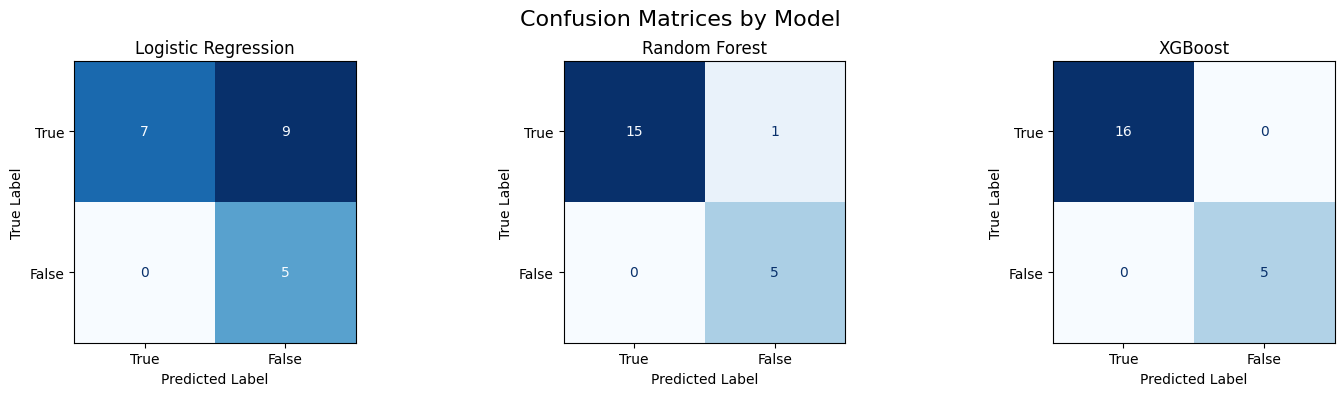

In [276]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 모델 이름 및 예측 결과 리스트
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
predictions = [y_pred_log, y_pred_rf, y_pred_xgb]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Confusion Matrices by Model', fontsize=16)

# 각 모델별 혼동 행렬 표시
for i, (name, pred) in enumerate(zip(model_names, predictions)):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True', 'False'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(name, fontsize=12)
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

모델의 분류 정확도와 일반화 성능, 클래스 불균형 상황에서의 안정성을 종합적으로 고려한 결과 XGBoost를 최종 분류 모델로 선정하였다.

이는 앞선 특징 선택 및 시각화를 통해 도출한 주요 특징들이 타겟 예측에 충분한 정보를 제공하고 있었다고 판단할 수 있다. 이후 예측 적용 시에도 우수한 성능을 기대할 수 있다.



<br>

### 특징 중요도 시각화: XGBoost

어떤 x값이 결과를 분류하는 데 있어 가장 중요한 역할을 했는지 시각화하여 확인해 본다.

plot_importance를 통해 XGBoost가 선택한 중요하고 유의미한 특징을 시각화함으로써 모델 해석 및 피처 선택 시 고려할 수 있다.


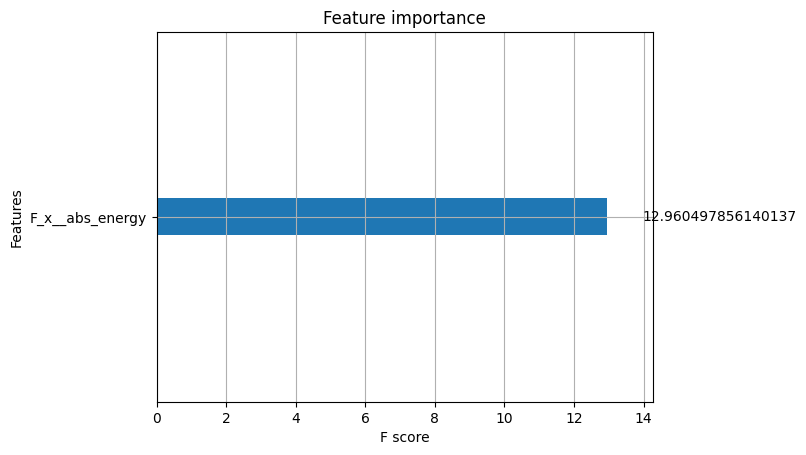

In [278]:
xgb.plot_importance(xgb_clf, importance_type = 'gain')
plt.show()

In [279]:
sum(xgb_clf.feature_importances_ != 0)

np.int64(1)

Fx 값의 abs_energy 특징만이 분류를 수행함에 있어서 중요한 역할을 했다는 것을 알 수 있다.

결국 고장 유무를 판별하는 기준은 F_X_abs_energy라는 특징 하나였다.

<br>

## 마무리

>Object2에서는 로봇 센서 기반 시계열 데이터를 활용하여 작업 실패 여부를 분류하는 모델을 구축해 보았다.
>
>tsfresh를 통해 자동 추출된 시계열 특징 중 분산, 정보량, 클래스 간 평균 차이를 기준으로 상위 특징을 선별하고 이를 바탕으로 다양한 분류 모델을 비교하였다.
>
>성능 평가 결과, XGBoost가 모든 평가 지표에서 완벽한 성능을 기록하며 최종 모델로 선정되었다.
>
>분석 과정에서 일부 특징은 타겟 클래스에 따라 뚜렷한 값 분포 차이를 보여 모델 해석 가능성 또한 확보할 수 있었다.
시계열 데이터의 특징은 시간 축을 그대로 해석기 보다는 패턴 변화에 숨어 있다는 것을 확인할 수 있었다.
>
>이를 정량적으로 표현하고 시각화함으로써 예측 성능에 어떻게 기여할 수 있을지 해석해 보면서 시계열 데이터에 대한 이해도가 조금은 오른 것 같다.

